# Assignment 2: Data Understanding & Preparation

## Overview

The purpose of this assignment is to familiarize you with some of the data understanding and preparation operations using the Python programming language. You will be working to derive insights from real-world data by using methods commonly employed during the data understanding and preparation processes. You are welcome to consult additional documentation and code, so long as all references and sources are properly cited in your source code (as comments or headers). Please free to email or meet with the instructor if you run into any problems.

#### Dataset
For this assignment, you will be working with a dataset on thyroid disease. The dataset is provided in comma-separated (CSV) file format. For all rows, the last column designates the class (y) and the remaining columns designate features (X). The first row consists of the feature and class names. Publicly available datasets are commonly provided in this format. You can find more details on the dataset here at the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Thyroid+Disease.

#### Submission
You are expected to submit a single Jupyter/IPython Notebook file for the assignment. Your code can be embedded into the notebook file as code cells, while your answers to the questions can be embedded as markdown cells. Please submit your notebook file via Canvas.

*NOTE: This notebook is provided only as a template for you to use for the assignment. You may modify it as you see fit.*

### Starter Code

For convenience, below we have provided an example of loading the dataset into a DataFrame for analysis via the pandas data analysis library.

In [1]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For plot formatting.
plt.style.use = 'default'
plt.rcParams["patch.force_edgecolor"] = True  # helpful for matplotlib version greater than 2

# Read in the file URL.
fileURL = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/hypothyroid.csv'

# Read the file into a DataFrame.
df = pd.read_csv(fileURL)

# Output the first few rows of the dataset.
df.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
0,72.0,M,f,f,f,f,f,f,f,f,...,0.6,y,15.0,y,1.48,y,10.0,n,NaN,hypothyroid
1,15.0,F,t,f,f,f,f,f,f,f,...,1.7,y,19.0,y,1.13,y,17.0,n,NaN,hypothyroid
2,24.0,M,f,f,f,f,f,f,f,f,...,0.2,y,4.0,y,1.00,y,0.0,n,NaN,hypothyroid
3,24.0,F,f,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,NaN,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,NaN,hypothyroid


## Questions
Use the dataset and the data understanding and preparation methods discussed in class to answer the following questions.
### Data Understanding

#### 1. Summary Statistics
##### 1a. Classes
What are the classes of data in the data set? What is the class distribution (proportion of examples belonging to each class)?

In [4]:
# solution
df['Class'].value_counts(normalize=True)

negative       0.952261
hypothyroid    0.047739
Name: Class, dtype: float64

There are two classes: `negative` (95.2% of instances) and `hypothyroid` (4.8% of instances)

##### 1b. Features
What is the minimum, maximum, mean, and standard deviation for each continous feature?

In [5]:
# solution
df.describe().loc[['min','max','mean','std']]

,Age,TSH,T3,TT4,T4U,FTI,TBG
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659


`df.describe()` computes all these statistics for us and ignores any non-continuous features. I simply added .loc to retrive the indices (statistics) in the order we wanted.

##### 1c. Missing values
How many observations are missing a value for `TT4`?

In [6]:
# solution
mask = df['TT4'].isna()
len(df.loc[mask])

249

249 observations appear to be missing a value for TT4.

#### 2. Equal-Width Binning
Bin all the continuous features using equal-width discretization (i.e., create a histogram). You may choose the number of bins. Visualize them. Any observations?

Note: it is fine for this assignment if you add more code cells to generate each plot. Matplotlib has a function `subplots` that you can use, but I find it somewhat annoying to use.

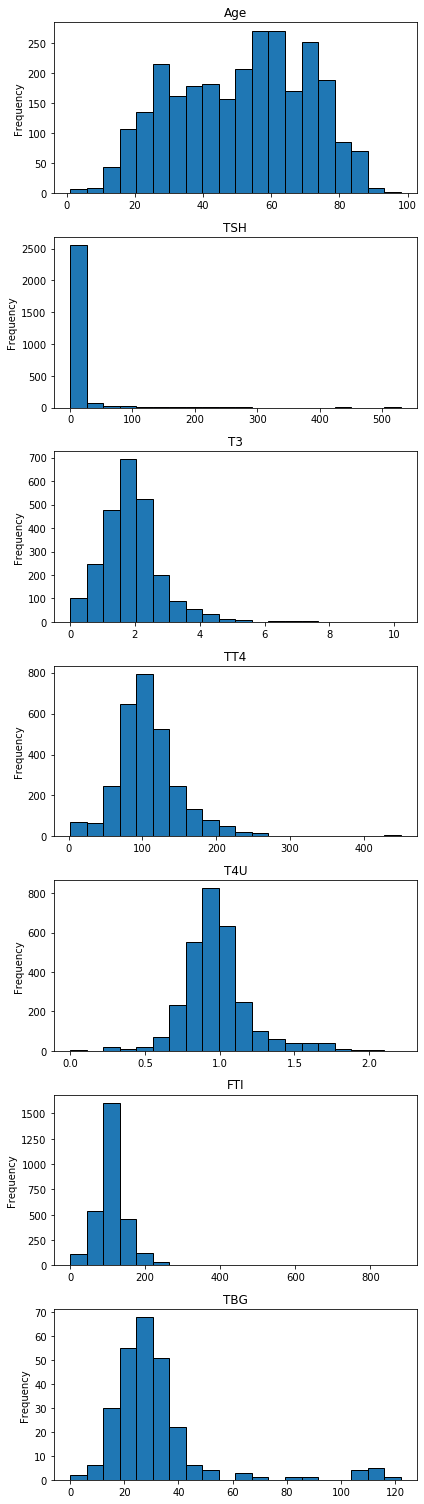

In [7]:
# solution
cont_features = df.describe().columns # easy trick to get the continuous columns

fig, ax = plt.subplots(nrows=len(cont_features), figsize=(6,3*len(cont_features)))
for i, col in enumerate(cont_features):
    df[col].plot(kind='hist', ax=ax[i], title=col, bins=20)
    
plt.tight_layout()

Most of the features seem to have a normal distribution. `TSH` is the only feature that follows a power law distribution. For `TBG`, we see a group of outliers with values over 100.

#### 3. Box Plots
Make box plots for each class and corresponding continuous feature (i.e., where the two classes are on the X-axis and the values for a single feature are on the Y-axis). Box plots help you to visualize the distributions of the two classes for each feature. What observations can you draw from the box plots?

Hint: the documentation for `pandas.DataFrame.boxplot` shows some options that you will find helpful.

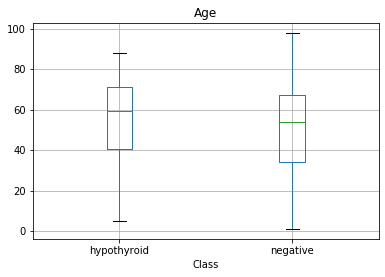

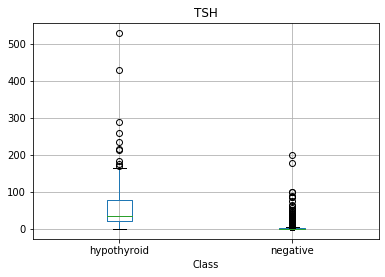

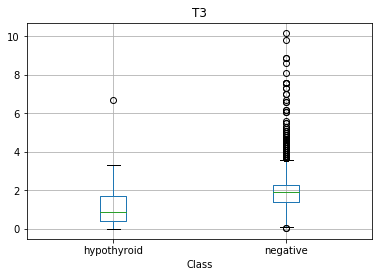

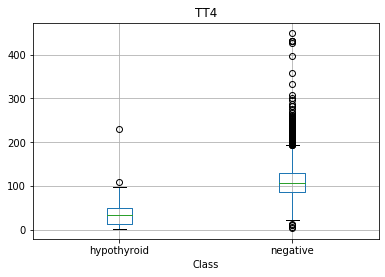

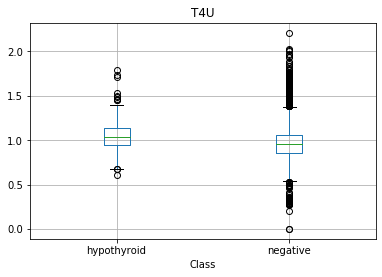

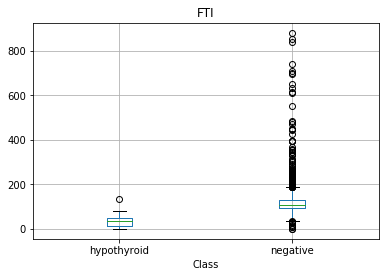

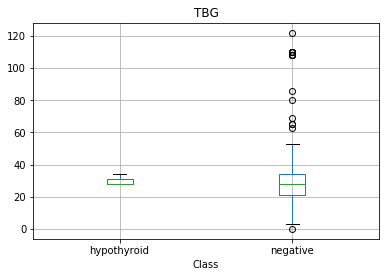

In [8]:
# solution
for f in cont_features:
    ax = df.boxplot(column=f, by='Class')
    plt.suptitle('')

Almost all of the features have something to note. For the positive class `hypothyroid`, we see:
1. `Age` trends slightly higher
2. `TSH` trends higher
3. `T3` trends lower
4. `TT4` trends lower
5. `T4U` does not look significantly different when accounting for the difference in size between samples
6. `FTI` trends lower
7. `TB` does not look significantly different, although the observations are more concentrated around the mean

### Data Preparation

#### 4. Standardization
Standardize the hypothyroid disease data so that the values of each continuous feature are standard normally distributed (i.e., Gaussian with zero mean and unit variance). Note that scikit-learn may be used to perform standardization (see sklearn.preprocessing.scale or sklearn.preprocessing.StandardScaler). Now make box plots for each class and corresponding feature. How do the plots differ from box plots made before standardization?

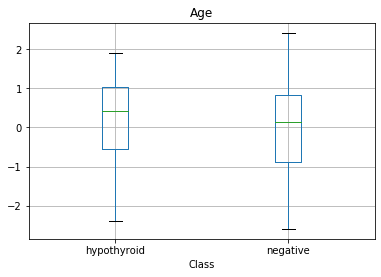

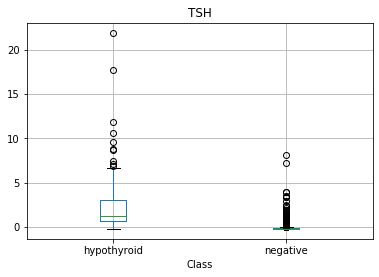

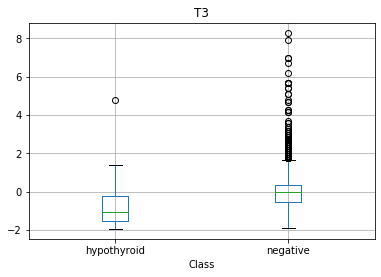

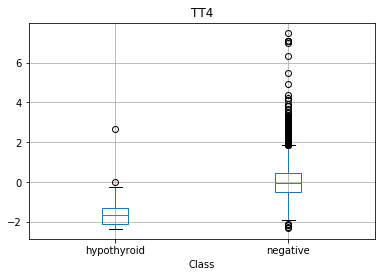

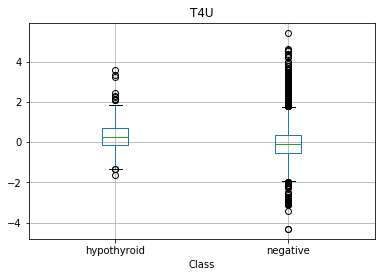

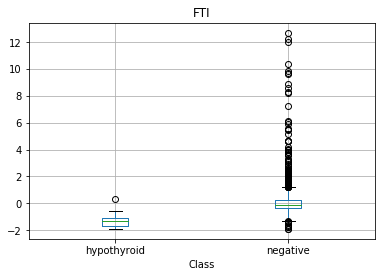

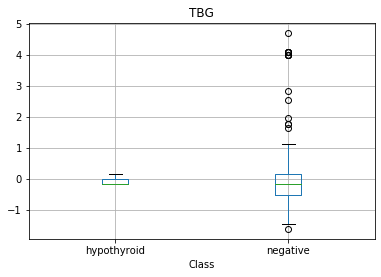

In [13]:
# solution 1
df_normalized = df.copy()
for feature in cont_features:
    df_normalized[feature] = df[feature].map(lambda x: (x - df[feature].mean()) / df[feature].std())

# solution 2
"""
from sklearn.preprocessing import StandardScaler
df_normalized = df.copy()
df_normalized[cont_features] = StandardScaler().fit_transform(df[cont_features])
"""

# same code from above
for f in cont_features:
    ax = df_normalized.boxplot(column=f, by='Class')
    plt.suptitle('')

While the values on the y-axis change, the visual distribution of observations does not.

#### 5. Sampling
Use simple random sampling without replacement to generate a subsampled dataset with an equal number of majority class and minority class instances, i.e., equal number of instances without and with hypothyroidism. How many majority and minority class instances are there now? Use box plots to assess how representative the subsampled majority class instances are of the majority class.

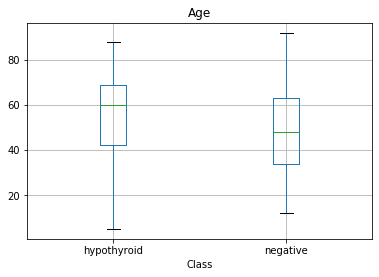

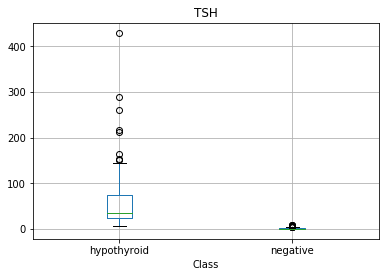

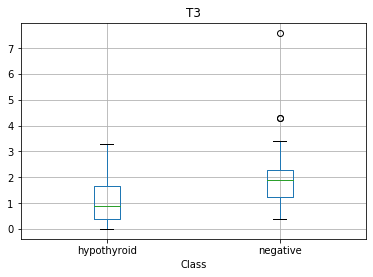

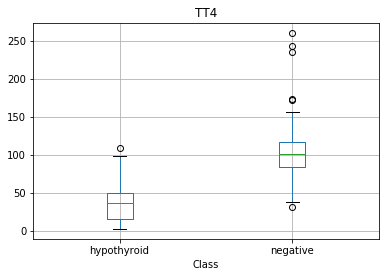

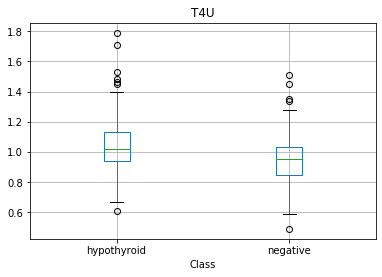

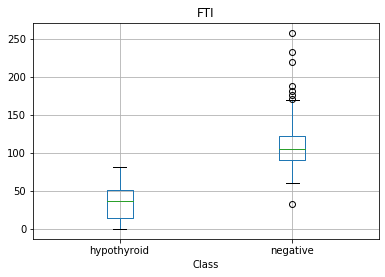

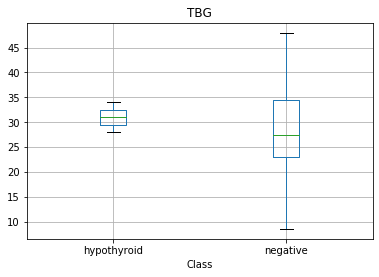

In [11]:
# solution
n_samples = 100
df_maj = df.loc[df['Class'] == 'negative']
df_min = df.loc[df['Class'] == 'hypothyroid']

maj_sample_idx = np.random.choice(df_maj.index, size=n_samples, replace=False)
min_sample_idx = np.random.choice(df_min.index, size=n_samples, replace=False)
all_sample_idx = np.concatenate([maj_sample_idx, min_sample_idx])

# same plot code as above
for f in cont_features:
    ax = df.loc[all_sample_idx].boxplot(column=f, by='Class')
    plt.suptitle('')

In this case, we subsampled 100 instances of each class. Our majority class samples seem to be a good representation of the entire majority class. There are fewer outliers, which makes sense, but the overall mean and quartile ranges are fairly similar for all features.

The larger the subsample size, the more likely it is to be representative of the original sample.

#### Extra Credit. PCA
Use principal component analysis (PCA) to reduce the dataset to 2 features (dimensions). Visualize the results. What do you observe?

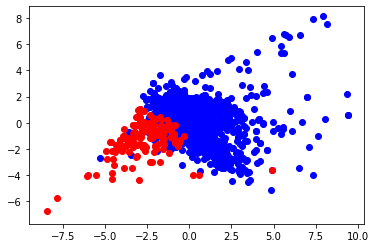

In [14]:
# solution
from sklearn.decomposition import PCA

df_pca = PCA(n_components=2).fit_transform(X=df_normalized[cont_features].fillna(0))

maj_idx = df.loc[df['Class'] == 'negative'].index
min_idx = df.loc[df['Class'] == 'hypothyroid'].index

plt.scatter(x=df_pca[maj_idx,0], y=df_pca[maj_idx,1], color='b')
plt.scatter(x=df_pca[min_idx,0], y=df_pca[min_idx,1], color='r')

The first two components of the PCA can clearly separate most of the `hypothyroid` instances from the `negative` instances. However, there is some section of overlap between the two classes, and there are some outliers for each.